## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


BUSINESS UNDERSTANDING
Microsoft is entering into an industry where it has no prior knowledge or experience in 
and seeks to understand the best performing films at the box office. It seeks to make the 
best data-driven decisions and leverage the analysis to make revenue.
The business landscape has different types of genres, it has different budgets, it generates 
different revenues
Objectives
To identity the best performing genres in terms of revenue
To identify the impact of voting reviews in terms of films performance
To identify correlation between production budget and box office revenue
To identify the trends and patterns related to different genres

In [60]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

In [61]:
#read in the data
df= pd.read_csv(r"C:\Users\nimu\Downloads\archive (8).zip")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [62]:
#looking at the overall shape
df.shape

(7668, 15)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB



The data types match with the columns information that we have.
The columns containing strings are type object, whereas the columns
containing decimal numbers (budget and gross) are type float64.

There are NaN values in the rating, budget, gross, company and
runtime columns, since there are 7668 total rows and each of those
columns contains fewer than 7668 non-null values.


DATA CLEANING

In [64]:
#check for missing data
df.isnull().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [65]:
#looking at samples that have no missing value
df1 = df[df["budget"].notna()].sample(
    5, random_state=1
)
df1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
4154,Divine Secrets of the Ya-Ya Sisterhood,PG-13,Drama,2002,"June 7, 2002 (United States)",6.1,19000.0,Callie Khouri,Rebecca Wells,Sandra Bullock,United States,27000000.0,73839240.0,All Girl Productions,116.0
6643,Mad Max: Fury Road,R,Action,2015,"May 15, 2015 (United States)",8.1,912000.0,George Miller,George Miller,Tom Hardy,Australia,150000000.0,375658750.0,Warner Bros.,120.0
1961,Johnny Suede,R,Comedy,1991,"April 22, 1992 (France)",5.8,3800.0,Tom DiCillo,Tom DiCillo,Brad Pitt,Switzerland,500000.0,90091.0,Arena,97.0
5119,P.S. I Love You,PG-13,Comedy,2007,"December 21, 2007 (United States)",7.0,203000.0,Richard LaGravenese,Richard LaGravenese,Hilary Swank,United States,30000000.0,156835339.0,Alcon Entertainment,126.0
5769,You Again,PG,Comedy,2010,"September 24, 2010 (United States)",5.8,50000.0,Andy Fickman,Moe Jelline,Kristen Bell,United States,20000000.0,32054369.0,Touchstone Pictures,105.0


The budget column has a lot of missing values and from the sample above,
it is clear that even though movies might be from the same genre,
they all have different figures in terms of budget that are very extreme
meaning we cannot replace the values as this will lead to skewed results.
I therefore decided to drop all the rows with missing values on the budget column
to maintain accuracy and validity of the results.

In [7]:
#drop all rows with missing values in the column
df.dropna(subset=["budget"], inplace=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [68]:
#looking at samples that have no missing value
df2 = df[df["gross"].notna()].sample(
    5, random_state=1
)
df2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6185,Universal Soldier: Day of Reckoning,R,Action,2012,"October 25, 2012 (United States)",5.0,20000.0,John Hyams,John Hyams,Jean-Claude Van Damme,United States,10000000.0,1402307.0,Foresight Unlimited,114.0
4417,Code 46,R,Drama,2003,"September 17, 2004 (United Kingdom)",6.2,20000.0,Michael Winterbottom,Frank Cottrell Boyce,Tim Robbins,United Kingdom,7500000.0,886018.0,BBC Films,93.0
6814,Louder Than Bombs,R,Drama,2015,"October 2, 2015 (Norway)",6.6,12000.0,Joachim Trier,Joachim Trier,Jesse Eisenberg,Norway,11000000.0,1160724.0,Motlys,109.0
4091,Blue Crush,PG-13,Drama,2002,"August 16, 2002 (United States)",5.7,30000.0,John Stockwell,Susan Orlean,Kate Bosworth,United States,25000000.0,51843679.0,Universal Pictures,104.0
3362,Hard Rain,R,Action,1998,"January 16, 1998 (United States)",5.9,33000.0,Mikael Salomon,Graham Yost,Morgan Freeman,United States,70000000.0,19870567.0,British Broadcasting Corporation (BBC) Television,97.0


In [8]:
#drop all rows with missing values in the column
df.dropna(subset=["gross"], inplace=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
#check other missing values
df.isnull().sum()

name         0
rating      12
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      1
budget       0
gross        0
company      2
runtime      1
dtype: int64

In [10]:
#drop all rows with missing values in the column
df.dropna(subset=["rating", "company", "runtime", "country"], inplace=True)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [11]:
#confirm there are no missing values
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [12]:
#drop unnecessary columns
df = df.drop(["released", "rating"], axis=1)
df

,name,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [13]:
# Rename the column
df.rename(columns={'gross': 'revenue'}, inplace=True)
df


,name,genre,year,score,votes,director,writer,star,country,budget,revenue,company,runtime
0,The Shining,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [14]:

#sort values according to the highest gross value
df.sort_values(by=['revenue'], inplace=False, ascending=False).head()


,name,genre,year,score,votes,director,writer,star,country,budget,revenue,company,runtime
5445,Avatar,Action,2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,Action,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,Drama,1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0



EXPLORATORY DATA ANALYSIS (EDA)

In [15]:
df.head()

,name,genre,year,score,votes,director,writer,star,country,budget,revenue,company,runtime
0,The Shining,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [16]:
df.describe()

,year,score,votes,budget,revenue,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


Budget

Count: There are 5,421 movie budgets in the dataset.
Mean: The average movie budget is approximately $36,009,170.
Standard Deviation: The standard deviation is approximately $41,573,370, indicating a wide range of budgets.
Min: The lowest movie budget in the dataset is $6,000.
25%: The first quartile of movie budgets is approximately $10,000,000.
Median: The median movie budget is approximately $21,800,000.
75%: The third quartile of movie budgets is approximately $45,000,000.
Max: The highest movie budget in the dataset is $356,000,000.
    Revenue

Count: There are 5,421 movie revenues in the dataset.
Mean: The average movie revenue is approximately $103,229,700.
Standard Deviation: The standard deviation is approximately $187,302,700, indicating a wide range of revenue figures.
Min: The lowest movie revenue in the dataset is $309.
25%: The first quartile of movie revenues is approximately $10,736,400.
Median: The median movie revenue is approximately $36,869,410.
75%: The third quartile of movie revenues is approximately $112,462,500.
Max: The highest movie revenue in the dataset is approximately $2,847,246,000.



In [17]:
#change the data type to an integer
df['budget'] = df['budget'].astype('int64')
df['revenue'] = df['revenue'].astype('int64')
df

,name,genre,year,score,votes,director,writer,star,country,budget,revenue,company,runtime
0,The Shining,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [18]:
#correlation pearson
df.corr(method='pearson')


,year,score,votes,budget,revenue,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
revenue,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


I used pearson correlation because I have numeric data.
It assumes a linear relationship between the variables.
It measures linear relationships, and from above we can see that budget 
is highly positively correlated with gross.

In [69]:
#convert them to the 'category' data type and then to categorical codes.
#We add a new column with _codes appended to the original column name to store the categorical codes.
df_num = df
for col_name in df_num.columns:
    if (df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
    
df_num 

        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


In [70]:
#correlation method using spearman
df_num.corr(method='spearman')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.012197,0.015940,0.011978,-0.011298,0.011505,0.008739,0.008912,0.009201,0.006639,-0.007715,0.022180,-0.000634,0.010211,0.015295
rating,-0.012197,1.000000,0.123670,-0.000120,0.031884,0.024234,0.022363,0.010232,0.001379,0.017564,0.025221,-0.254885,-0.173251,-0.079008,0.072508
genre,0.015940,0.123670,1.000000,-0.081261,0.029685,0.067659,-0.204214,-0.016710,0.003902,-0.004860,-0.067968,-0.376346,-0.288896,-0.089637,-0.023203
year,0.011978,-0.000120,-0.081261,1.000000,-0.000334,0.099045,0.469829,-0.019843,-0.008666,-0.026876,-0.088509,0.317336,0.293084,-0.004300,0.142977
released,-0.011298,0.031884,0.029685,-0.000334,1.000000,0.041079,-0.014314,-0.001206,-0.002330,0.015694,-0.026772,-0.006394,-0.045193,-0.007243,0.006738
score,0.011505,0.024234,0.067659,0.099045,0.041079,1.000000,0.428138,0.014691,0.019175,0.000372,-0.218330,-0.001403,0.126116,-0.006822,0.399857
votes,0.008739,0.022363,-0.204214,0.469829,-0.014314,0.428138,1.000000,0.019429,0.013890,-0.013697,0.073396,0.502466,0.742050,0.185955,0.290159
director,0.008912,0.010232,-0.016710,-0.019843,-0.001206,0.014691,0.019429,1.000000,0.299032,0.039391,0.012424,-0.008635,0.015700,0.004255,0.015192
writer,0.009201,0.001379,0.003902,-0.008666,-0.002330,0.019175,0.013890,0.299032,1.000000,0.027368,0.011371,-0.023175,0.001202,0.005256,-0.012915
star,0.006639,0.017564,-0.004860,-0.026876,0.015694,0.000372,-0.013697,0.039391,0.027368,1.000000,-0.020899,-0.014599,-0.012207,0.010087,0.008661


I used Spearman's correlation because it is non-parametric and
can be used in ordinal and non-normally distributed data.
It measures the strength and direction of monotonic relationships.
it is robust to outliers and does not assume a linear relationship.
A monotonic relationship is a mathematical or statistical relationship between two variables where,
as one variable increases (or decreases), the other variable consistently increases (or decreases) as well. 
In other words, there is a systematic trend or pattern in the relationship between the two variables,
but it doesn't have to be strictly linear.
Positive Monotonic Relationship: In a positive monotonic relationship, as one variable increases,
the other variable also increases. This means that higher values of one variable are associated
with higher values of the other.


In [19]:
df.isnull().sum()

name        0
genre       0
year        0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
revenue     0
company     0
runtime     0
dtype: int64

In [20]:
#multiple regression
X = df[['budget', 'score', 'runtime']]  # Independent variables
y = df['revenue']  # Dependent variable
X = sm.add_constant(X) # constant
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     2470.
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:16:12   Log-Likelihood:            -1.0862e+05
No. Observations:                5421   AIC:                         2.172e+05
Df Residuals:                    5417   BIC:                         2.173e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.056e+08   1.26e+07    -16.297      0.0

In this case, the R-squared is 0.578,
which means that approximately 57.8% of the variability in revenue is explained by the independent variables.
The F-statistic tests the overall significance of the regression model. 
In this case, the F-statistic is 2470 with a very low p-value indicating the model is significant.


DATA VISUALIZATION

<AxesSubplot:xlabel='budget', ylabel='Count'>

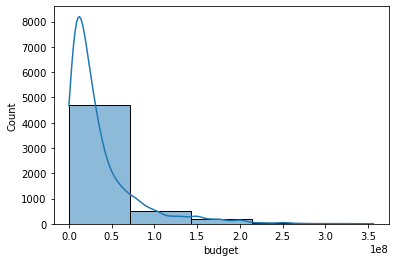

In [22]:
sns.histplot(df['budget'], kde = True, bins=5)

The histogram above shows that the majority of the budget falls between 0-0.5.

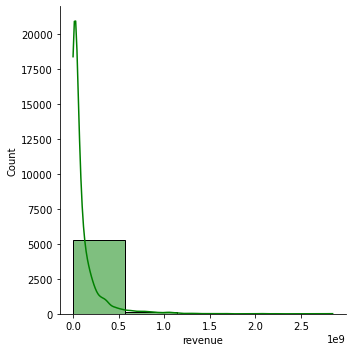

In [24]:
#distributionplot
sns.displot(df['revenue'], kde=True, bins=5, color = 'g')


The distribution of revenue earned is highly geared below the 0.5 point

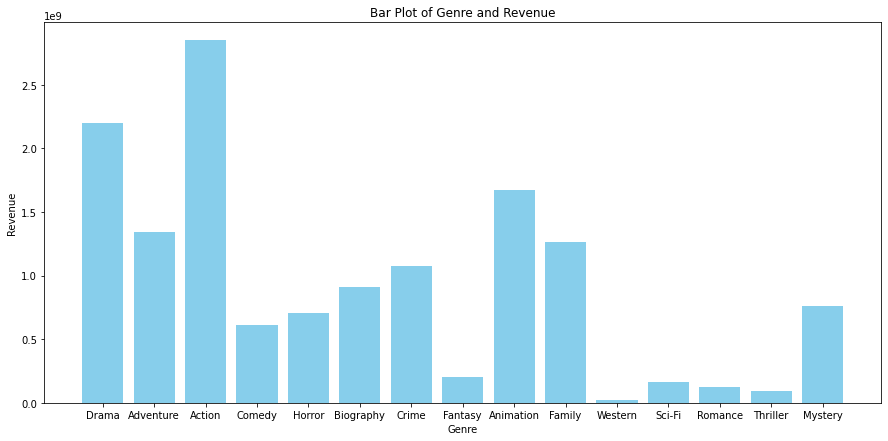

In [25]:
categories = df['genre']
values = df['revenue']

# Create a bar plot
plt.figure(figsize=(15,7)) #Set the figure size
plt.bar(categories, values, color='skyblue')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('Bar Plot of Genre and Revenue')


# Display the bar plot
plt.show()

The bar chart above shows that the genre Action brings the most revenue followed by drama.


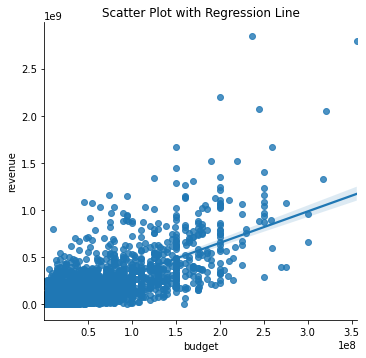

In [26]:
# Create a scatter plot with a regression line
sns.lmplot(x='budget', y='revenue', data=df, palette='YlGnBu')

# Add a title to the plot
plt.title('Scatter Plot with Regression Line')

# Show the plot
plt.show()


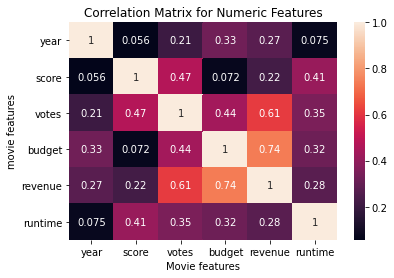

In [27]:
#correlation pearson
correlation_matrix= df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('movie features')
plt.show()


Budget and revenue are highly corelated meaning an increase in one leads to a proportionate inrease in the other

2ND DATASET

In [72]:
#read the data
data = pd.read_csv(r"C:\Users\nimu\Downloads\archive (3).zip")
data.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [73]:
data.shape

(250, 13)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [75]:
# display the data types of the columns
data.dtypes

rank             int64
name            object
year             int64
rating         float64
genre           object
certificate     object
run_time        object
tagline         object
budget          object
box_office      object
casts           object
directors       object
writers         object
dtype: object

In [32]:
#remove the dollar sign
data['budget'] = data['budget'].replace('$', '')
data.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [76]:
#remove the dollar sign
data['box_office'] = data['box_office'].replace('$', '')  
data.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [34]:
#display the names of all columns
data.columns

Index(['rank', 'name', 'year', 'rating', 'genre', 'certificate', 'run_time',
       'tagline', 'budget', 'box_office', 'casts', 'directors', 'writers'],
      dtype='object')

In [35]:
#drop the rank column
data = data.drop(["rank"], axis=1)
data.head()

,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [80]:
#for all the columns that have their data type as an integer input catcodes 

df_num = data
for col_name in df_num.columns:
    if (df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
    
df_num 


,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,214,1994,9.3,71,10,52,69,54,97,218,43,207
1,2,187,1972,9.2,63,10,78,38,94,84,161,41,141
2,3,179,2008,9.0,9,8,62,229,38,0,49,20,117
3,4,188,1974,9.0,63,10,91,30,16,150,4,41,62
4,5,0,1957,9.0,63,2,13,119,72,213,98,134,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,197,2011,8.1,71,8,55,53,54,67,241,142,214
246,247,45,1975,8.2,18,3,52,209,79,33,153,2,7
247,248,8,1992,8.0,34,3,7,231,126,220,205,127,190
248,249,60,1982,8.0,46,7,87,89,46,164,20,116,108


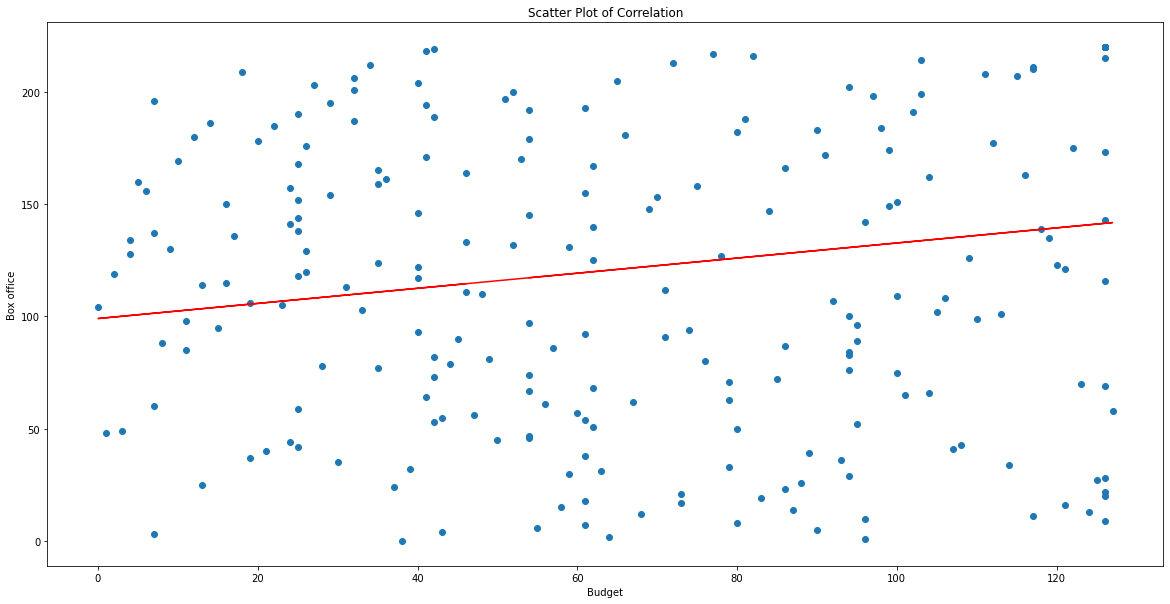

In [81]:

from scipy.stats import linregress


x = data['budget']
y = data['box_office']

# Create a scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("Budget")
plt.ylabel("Box office")
plt.title("Scatter Plot of Correlation")

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line values
regression_line = slope * x + intercept

# Add the regression line to the plot
plt.plot(x, regression_line, '-', color='red')

# Display the plot
plt.show()


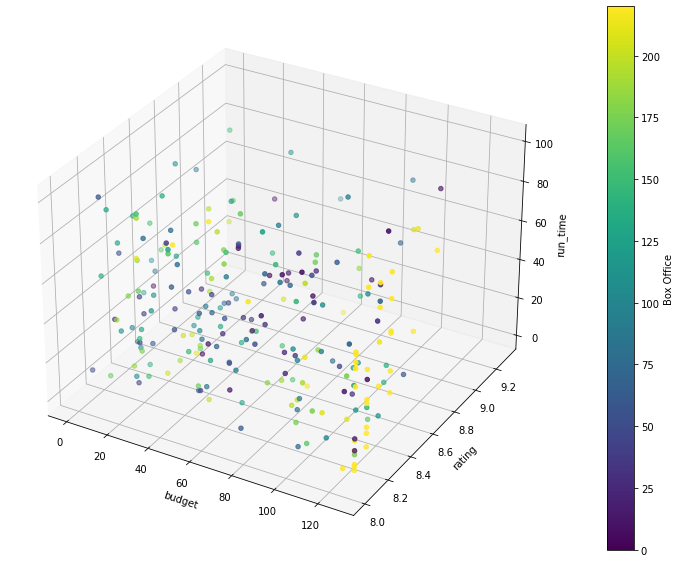

In [83]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(data['budget'], data['rating'], data['run_time'], c=data['box_office'], cmap='viridis')

ax.set_xlabel('budget')
ax.set_ylabel('rating')
ax.set_zlabel('run_time')

plt.colorbar(sc, label='Box Office')

plt.show()


DATASET 3

In [40]:
#load in the dataset
dataframe = pd.read_csv(r"C:\Users\nimu\Documents\Phaseone\dsc-phase-1-project-v2-4\zippedData\tn.movie_budgets.csv.gz")

In [41]:
dataframe.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [42]:
dataframe.shape

(5782, 6)

In [43]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [44]:

#display the data types of each column
dataframe.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [45]:

#remove the dollar signs
dataframe['production_budget'] = dataframe['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)

dataframe.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747"


In [46]:

dataframe['domestic_gross'] = dataframe['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)

dataframe.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747"


In [47]:
dataframe['worldwide_gross'] = dataframe['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
dataframe.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09


In [48]:
dataframe.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [49]:
#find the correlation between the variables
dataframe.corr()

,id,production_budget,domestic_gross,worldwide_gross
id,1.000000,-0.035278,0.008255,-0.009422
production_budget,-0.035278,1.000000,0.685682,0.748306
domestic_gross,0.008255,0.685682,1.000000,0.938853
worldwide_gross,-0.009422,0.748306,0.938853,1.000000


The data shows that production budget and the revenue received both domestically and internationally,
is highly positively correlated.

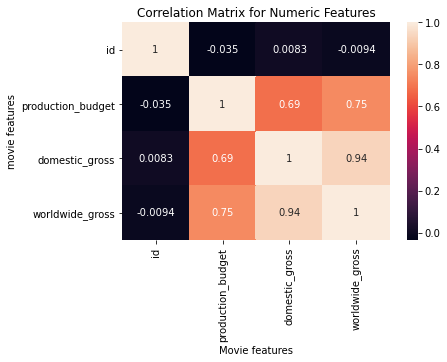

In [50]:

#correlation pearson
correlation_matrix= dataframe.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.rcParams['figure.figsize'] = (20,10)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('movie features')
plt.show()

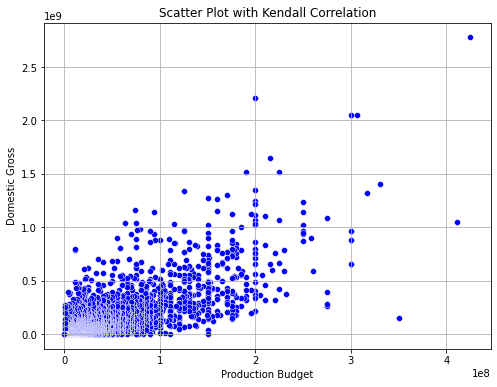

In [51]:

# Calculate the Kendall correlation coefficient
kendall_corr = dataframe['production_budget'].corr(dataframe['worldwide_gross'], method='kendall')

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataframe, x='production_budget', y='worldwide_gross', color='blue')

# Set plot labels and title
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.title('Scatter Plot with Kendall Correlation')

# Show the plot
plt.grid(True)
plt.show()

The scatter plot shows a positive relationship between budget and revenue.
There are a few outliers but most of the data is clustred in one place.

DATASET 4

In [52]:
import pandas as pd
import sqlite3

# Connect to the SQLite 3 database
conn = sqlite3.connect(r"C:\Users\nimu\Documents\Flatiron\im.db")  # Replace 'your_database.db' with your database file path

# Use the following query to fetch the table names
query = "SELECT name FROM sqlite_master WHERE type='table';"

# Use pandas to execute the query and read the results into a DataFrame
tables = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the list of table names
print("Tables in the database:")
print(tables)



Tables in the database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [53]:
import sqlite3 
conn = sqlite3.connect(r'C:\Users\nimu\Documents\Flatiron\im.db')
q = """
SELECT *
FROM movie_basics
LIMIT 10
;
"""
pd.read_sql(q, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [54]:
import sqlite3 
conn = sqlite3.connect(r'C:\Users\nimu\Documents\Flatiron\im.db')
q = """
SELECT *
FROM movie_ratings
LIMIT 10
;
"""
pd.read_sql(q, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [55]:
q = """
SELECT genres, averagerating
FROM movie_basics AS b
JOIN movie_ratings AS r
ON b.movie_id = r.movie_id
WHERE averagerating > '9'
AND numvotes > '10000'
;
"""
pd.read_sql(q, conn)


,genres,averagerating
0,"Action,Drama,War",9.3
1,"Crime,Mystery,Thriller",9.3
2,"Comedy,Documentary",9.2
3,Drama,9.3


The genres above have the highest rating across all.

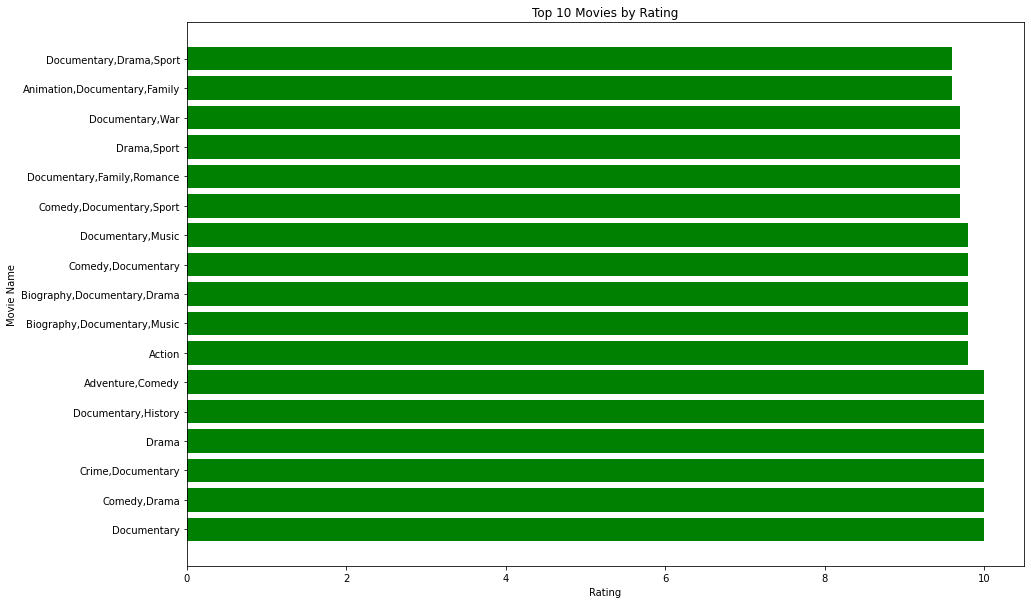

In [58]:
# Connect to the SQLite database
conn = sqlite3.connect(r'C:\Users\nimu\Documents\Flatiron\im.db')

# Write your SQL query to retrieve the top 10 movies and their ratings
q = """
SELECT genres, averagerating
FROM movie_basics AS b
JOIN movie_ratings AS r
ON b.movie_id = r.movie_id
ORDER BY averagerating DESC
LIMIT 50
;
"""

# Execute the query and read the result into a DataFrame
df = pd.read_sql(q, conn)

# Close the database connection
conn.close()

# Create a bar chart to visualize the ratings of the top 10 movies
plt.figure(figsize=(15, 10))
plt.barh(df['genres'], df['averagerating'], color='green')
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.title('Top 10 Movies by Rating')
  
plt.show()


The genre crime, drama and documentary have the highest rating